# Lab 06 - Data Preprocessing I

**DUE: Feb 12, 2024 (Monday)**  
Pair Programming: Optional  

Name(s): Samuel Baldwin
Class: CSCI 349 - Intro to Data Mining  
Section: 01
Semester: Spring 2024
Instructors: Brian King, Joshua Stough


---
# Objectives
* Experience the "joy" that is data munging. Munge, munge, munge!
* Start dealing with noisy, unclean, real-world data
* Work with times and dates in your data

## Pair programming
Don't forget that pair programming is allowed and even encouraged on these labs moving forward.

# Introduction
As you learned in class, data cleaning represents a large part of the work of the data scientist.  You are going to download a real-world dataset, and do some preliminary cleaning, EDA, and reporting.

---
# Preparing for your lab

Do each of the following...

* Modify the header cell above with your name(s).
* If you haven't yet, create a new folder at the same level as your labs and hw folder you created, called `data`.
    * This folder will store the data that you are working with through the semester. Sometimes the data we work with can be downloaded directly from an online URL, and other times (such as this exercise), the data will need to be downloaded from public repositories locally onto your laptop. And worse yet, most data are not cleaned and tidied up for you to play with!

---
## The Pennsylvania State Climatologist Database

Penn State has an excellent public database of weather observations collected from a wide range of stations scattered throughout the state. Some of them go back to the 1940s. For this lab, we're going to explore one of those datasets – Williamsport, PA.

Go to the [The Pennsylvania State Climatologist](http://climate.met.psu.edu). From this page:
* Select **Data**
* Select **Data Archive**
* For **Select a network** select **FAA Hourly**.
* You are going to investigate the weather observations *Williamsport, PA*, whose FAA code is **KIPT**. Select it.

Now you need to select the range of observations and variables we're interested in. Enter the following:

* Start and End Dates: **2000-01-01** to **2023-12-31**.
* Select ALL attributes to download (from Date/Time, Number of observations… etc… right through Max Wind Speed).
* Output file type should be a CSV file
* Select Yes to include Metadata. (Metadata is information about data. This usually contains valuable information, and you almost always want to retain this information unless you are provided with an explicit *schema*, which we are not.)

**Click Submit.**

Download the data (which will most likely place your data into your Downloads folder.)  It'll be a long filename. That's fine. I usually always add the suffix "_raw" to indicate this is the raw data that I'm working with from my source. *Never lose track of your original dataset.*

You are not done. Move that file over to your `data` directory you created (which should be at the same directly level as your `labs` directory.) If you placed the .csv file in the correct place, then your path should be:

`../data/faa_hourly-KIPT_20000101-20231231_raw.csv`




In [8]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

print(pd.show_versions())

/Users/samuelbaldwin/anaconda3/envs/csci349/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit              : a671b5a8bf5dd13fb19f0e88edc679bc9e15c673
python              : 3.10.13.final.0
python-bits         : 64
OS                  : Darwin
OS-release          : 21.6.0
Version             : Darwin Kernel Version 21.6.0: Thu Jun  8 23:57:12 PDT 2023; root:xnu-8020.240.18.701.6~1/RELEASE_X86_64
machine             : x86_64
processor           : i386
byteorder           : little
LC_ALL              : None
LANG                : en_US.UTF-8
LOCALE              : en_US.UTF-8

pandas              : 2.1.4
numpy               : 1.26.3
pytz                : 2023.3.post1
dateutil            : 2.8.2
setuptools          : 68.2.2
pip                 : 23.3.1
Cython              : None
pytest              : None
hypothesis          : None
sphinx              : None
blosc               : None
feather             : None
xlsxwriter          : None
lxml.etree          : None
html5lib            : None
pymysql             : None
psycopg2            : 

---
**1)**	 [P] Use pandas to read in your data file you downloaded above, which you should have placed in your data directory. Call the data frame `df_temps`.  Read in the entire dataset, however, be sure to ignore the first 16 rows from the input (HINT: use the `skiprows=` option!)

**NOTE:** ALWAYS BE SURE TO LOOK AT YOUR ACTUAL DATA AS PLAIN TEXT BEFORE TRYING TO READ IN A RAW DATASET! JUST BECAUSE A DATASET HAS A `.csv` EXTENSION DOES NOT MEAN THAT YOU CAN RELY ON EVERY ROW BEING A PROPERLY FORMATTED ROW! For instance, notice that the header row is scattered throughout your data! Notice that you have some extra columns at the end that are consistently empty! The inexperienced data scientists are tempted to manually edit the file to make it easy to read. *NO. WRONG! BAD DATA SCIENTIST!*

>**Never change your raw data.**
>
> Write your Python cleaning code to always work with raw, uncleaned data. Why? In practice, your data file may be huge. You may need to repeatedly grab fresh data, and those data will only have the same issues. Do you really want to repeat your manual editing silliness every time you have a fresh file? No! It may take a bit more work up front, but ALWAYS strive to write code to preprocess every aspect of your raw data file! It will always save you work later!

In [9]:
# ANSWER
df_temps = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), "data/faa_hourly-KIPT_20000101-20231231_raw.csv"), skiprows=15)
df_temps

,Date/Time (GMT),Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph),Unnamed: 13
0,2000-01-01 00:00:00,1,26.10,26.1,26.1,14.00,NaN,20.7,59.00,17.30,1015.2,280.00,17.3,NaN
1,2000-01-01 01:00:00,1,26.10,26.1,26.1,14.00,NaN,NaN,59.00,16.10,1015.9,280.00,16.1,NaN
2,2000-01-01 02:00:00,1,26.10,26.1,26.1,15.10,NaN,NaN,62.00,15.00,1016.3,280.00,15.0,NaN
3,2000-01-01 03:00:00,1,26.10,26.1,26.1,12.00,NaN,NaN,54.00,16.10,1016.6,270.00,16.1,NaN
4,2000-01-01 04:00:00,1,26.10,26.1,26.1,14.00,NaN,NaN,59.00,12.70,1017.3,280.00,12.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207725,2023-12-31 19:00:00,13,40.72,41.0,39.2,26.45,NaN,NaN,56.69,8.68,1014.5,249.23,12.7,NaN
207726,2023-12-31 20:00:00,13,40.50,41.0,39.2,26.45,NaN,NaN,57.15,5.95,1014.3,255.00,6.9,NaN
207727,2023-12-31 21:00:00,13,39.25,39.9,39.2,27.62,NaN,NaN,63.00,2.41,1014.5,137.69,5.8,NaN
207728,2023-12-31 22:00:00,13,38.96,39.2,37.4,27.11,NaN,NaN,62.46,0.00,1014.7,0.00,0.0,NaN


---
**2)**	Report the general structure of the data frame using `df_temps.info()`. Notice any column that is read in as a plain `object` type. You should have one column with this problem.

In [10]:
# ANSWER
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207730 entries, 0 to 207729
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                207730 non-null  object 
 1   Number of Observations (n/a)   207730 non-null  int64  
 2   Average Temp (F)               206660 non-null  float64
 3   Max Temp (F)                   206660 non-null  float64
 4   Min Temp (F)                   206660 non-null  float64
 5   Average Dewpoint Temp (F)      206538 non-null  float64
 6   1 Hour Precip (in)             33203 non-null   float64
 7   Max Wind Gust (mph)            28228 non-null   float64
 8   Average Relative Humidity (%)  202150 non-null  float64
 9   Average Wind Speed (mph)       207117 non-null  float64
 10  Average Station Pressure (mb)  207369 non-null  float64
 11  Average Wind Direction (deg)   173683 non-null  float64
 12  Max Wind Speed (mph)          

---
This is a pretty good dataset with lots of real problems! It gives you a chance to understand how important it is to select the smallest, yet most accurate data type for every variable. This is particularly true with respect to your memory footprint. With enormous data involving millions of records, you often need to perform various paging exercises to load in chunks of data into memory, substantially slowing down the machine learning methods. In other words, the more data you can fit in memory, the better! (In reality, the above is quoting a relatively small amount of memory. But, it's never too early to develop good habits!)


---
**3)**	[P] Read about the `memory_usage()` method of pandas data frames. Then, report the total memory in bytes for each variable of df_temps. Set the parameter `drop=True`, to get the most accurate assessment of your total memory usage.

In [11]:
# ANSWER
df_temps.memory_usage(deep = True)

Index                                 128
Date/Time (GMT)                  15787480
Number of Observations (n/a)      1661840
Average Temp (F)                  1661840
Max Temp (F)                      1661840
Min Temp (F)                      1661840
Average Dewpoint Temp (F)         1661840
1 Hour Precip (in)                1661840
Max Wind Gust (mph)               1661840
Average Relative Humidity (%)     1661840
Average Wind Speed (mph)          1661840
Average Station Pressure (mb)     1661840
Average Wind Direction (deg)      1661840
Max Wind Speed (mph)              1661840
Unnamed: 13                       1661840
dtype: int64

---
**4)**	Report the total memory required for the data frame in MB. (Just sum the previous answer and correct your units accordingly)

In [12]:
# ANSWER
total_memory = df_temps.memory_usage(deep = True).sum()/1024/1024
print(f'{round(total_memory,2)} mb')

35.66 mb


---
**5)**	[P] You have a rather annoying extra column that was read in in the last column position. (Look closely at the output of `info()` above!) You should always confirm that it's garbage before deleting it. Write the single line of code that reports the count of valid values in the last column (HINT: `count()`)

 

In [13]:
# ANSWER
df_temps.iloc[:,-1].count()

0

---
**6)**	Drop that last column from `df_temps`.

In [14]:
# ANSWER
df_temps = df_temps.iloc[:,:-1]
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207730 entries, 0 to 207729
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                207730 non-null  object 
 1   Number of Observations (n/a)   207730 non-null  int64  
 2   Average Temp (F)               206660 non-null  float64
 3   Max Temp (F)                   206660 non-null  float64
 4   Min Temp (F)                   206660 non-null  float64
 5   Average Dewpoint Temp (F)      206538 non-null  float64
 6   1 Hour Precip (in)             33203 non-null   float64
 7   Max Wind Gust (mph)            28228 non-null   float64
 8   Average Relative Humidity (%)  202150 non-null  float64
 9   Average Wind Speed (mph)       207117 non-null  float64
 10  Average Station Pressure (mb)  207369 non-null  float64
 11  Average Wind Direction (deg)   173683 non-null  float64
 12  Max Wind Speed (mph)          

---
**7)**	[M] Look over the data type column in the `info()` output. ALWAYS pay attention to the types of each variable. In particular, pay attention to the variables that are read in as `object` type. This implies that pandas did not have enough confidence to convert the type itself, and you need to do it. Are there any `object` types? If so what? What format are the data in that column(s)?

**ANSWER**
The singular object type within this dataset is the *Date (GMT)* column. It looks like this is supposed to be a DateTime python object, as it is in YYYY-DD-MM-HH-MM-SS. 

---
**8)**	[P] How many NaN values are in each variable? (NOTE: Leave the NaN fields alone! The fact that they are missing is IMPORTANT! And, leave the date/time variable in the first column alone. Dates are very common in data, and it is important that you represent dates as actual date types. We'll deal with that shortly.)

In [15]:
# ANSWER
df_temps.isna().sum()

Date/Time (GMT)                       0
Number of Observations (n/a)          0
Average Temp (F)                   1070
Max Temp (F)                       1070
Min Temp (F)                       1070
Average Dewpoint Temp (F)          1192
1 Hour Precip (in)               174527
Max Wind Gust (mph)              179502
Average Relative Humidity (%)      5580
Average Wind Speed (mph)            613
Average Station Pressure (mb)       361
Average Wind Direction (deg)      34047
Max Wind Speed (mph)                613
dtype: int64

---
**9)**	[P] Report the NaN output as a percentage of the total number of values that are missing for each variable

In [16]:
# ANSWER
df_temps.isna().sum()/df_temps.isna().sum().sum()*100

Date/Time (GMT)                   0.000000
Number of Observations (n/a)      0.000000
Average Temp (F)                  0.267738
Max Temp (F)                      0.267738
Min Temp (F)                      0.267738
Average Dewpoint Temp (F)         0.298265
1 Hour Precip (in)               43.670508
Max Wind Gust (mph)              44.915362
Average Relative Humidity (%)     1.396239
Average Wind Speed (mph)          0.153386
Average Station Pressure (mb)     0.090330
Average Wind Direction (deg)      8.519311
Max Wind Speed (mph)              0.153386
dtype: float64

---
**10)**	[PM] Report the number of observations have at least one missing value. Report this as a raw number and as a percentage of the total number of observations. Then, from the answer to the previous problem, clearly state why this is NOT a problem to be concerned about for this particular dataset. (HINT: Which variable(s) have most of the missing data? Why?)


**ANSWER:**
The fact that a vast majority of the rows within the dataset is not an issue, as the striking majority of nans are within two columns of data (Wind Gust, and 1-hr Precipitation). Thus, it isn't that the majority of the dataset is missing, but rather the majroity of the dataset does not hav


In [17]:
# ANSWER
print(f'{len(df_temps[df_temps.isna().any(axis=1)])} rows have at least one nan, which is {round(len(df_temps[df_temps.isna().any(axis=1)])/len(df_temps)*100, 2)}% of all rows')

201609 rows have at least one nan, which is 97.05% of all rows


---
**11)**	[P] Look over your data types. By default, most of the time pandas will convert your integer types to a 64-bit integer, and floating point types will use double precision numbers. You can do far better. Read over the `pd.to_numeric()` function. Did you notice the parameter called `downcast`? Go back and read about this parameter. Downcast your types accordingly. Then, look over the output of `info()` and report your latest memory usage in MB.





In [18]:
# ANSWER
df_temps['Number of Observations (n/a)'] = pd.to_numeric(df_temps['Number of Observations (n/a)'], downcast = "integer")
for col in df_temps.columns[2:]: 
    df_temps[col] = pd.to_numeric(df_temps[col], downcast ="float")
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207730 entries, 0 to 207729
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                207730 non-null  object 
 1   Number of Observations (n/a)   207730 non-null  int8   
 2   Average Temp (F)               206660 non-null  float32
 3   Max Temp (F)                   206660 non-null  float32
 4   Min Temp (F)                   206660 non-null  float32
 5   Average Dewpoint Temp (F)      206538 non-null  float32
 6   1 Hour Precip (in)             33203 non-null   float32
 7   Max Wind Gust (mph)            28228 non-null   float32
 8   Average Relative Humidity (%)  202150 non-null  float32
 9   Average Wind Speed (mph)       207117 non-null  float32
 10  Average Station Pressure (mb)  207369 non-null  float32
 11  Average Wind Direction (deg)   173683 non-null  float32
 12  Max Wind Speed (mph)          

---
**12)**	[P] How much did our memory footprint improve? (Show the total memory usage using `deep=True`). Report the total memory usage in MB, and report the percentage improvement. (HINT: You should have reduced your memory footprint by about 32.7% so far)

In [19]:
# ANSWER
new_usage = df_temps.memory_usage(deep = True).sum()/1024/1024
print(f'% Memory reduction {round((1- new_usage/total_memory) * 100, 2)}%')

% Memory reduction 32.78%


---
# Data Transformations with Dates

It is very common to deal with dates in data. Unfortunately, few organizations around the world have agreed to one format for universally representing dates in data. Adding to the complexity are time zones that you must deal with. We'll discuss that later. Let's suppose we wanted to represent February 6, 2023, depending on your location in the world, the date might be stored in the data as:

* 02/06/2023
* 06/02/23
* 06/02/2023
* 06.02.2023
* 2023-Feb-06
* February 06, 2023
* 06-Feb-2023
* 20230206

And, there are others! Insanity! Can't we all just get along??? (Apparently not, especially when it comes to dates and times, and currencies, and food, and etc.) The fact is that these are all acceptable formats for dates. Sometimes pandas can do a pretty good just detecting date fields. However, as we noticed in this case, not always. It's up to YOU to make sure you convert your data to the most appropriate type.

Generally speaking, when your data consists of a series of observations recorded over time, we refer to these types of data as **time series** data. And, usually every observation will have a time or a date variable that identifies when the observation was recorded.

[Time series / date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) has just about everything you need to deal with dates with time series data. It has far more than you'll need   . As with most of the API with core packages like pandas, there is a LOT to absorb, and at best, you'll just become familiar with how to find the answers you are after in their documentation!

This portion of the lab will help you learn how to confidently work with dates and times in data.



---
**13)**	[M] There are four primary classes in pandas for working with dates and times? Consider the Scalar Class for each, and state what concept each is representing.

**ANSWER:** 
The first class for dates and times in pandas is Timestamp. This is equivalent to the DateTimeIndex Array Class, and is generally used to represent static Dates/Times. \
The second class for dates and times in pandas is Timedeltas. This is equivalent to the TimeDeltaIndex Array Class and is generally used to represent the absolute time difference  between two static Dates/Times. \
The third class for dates and times in pandas is Period. This is equivalent to the PeriodIndex Array Class and is generally used to represent time spans. \
The final class used for dates and times in pandas is DateOffset. This does not have an array class equivalent and is used to represent a relative time duration that respects calendar arithmetic.

---
**14)**	[M] For each above, state the primary creation method used to create each type of data

**ANSWER:**
For Timestamp, *to_datetime* or *date_range* is used. \
For Timedeltas, *to_timedelta* or *timedelta_range* is used. \
For Periods, *Period* or *period_range* is used.\
For DateOffsets, *DateOffset* is used.






---
**15)**	[P] Create a Timestamp object from the string "07/04/19", which is a date representing July 4, 2019. Store the object as `d1` and show it.

In [20]:
# ANSWER
d1 = pd.to_datetime("07/04/19")
d1


Timestamp('2019-07-04 00:00:00')

---
**16)**	[P] Using `d1` and string formatting codes, print the string from `d1`:

"Today's date is Thursday, July 4, 2019". 

In [21]:
# ANSWER
print(f'Today\'s date is {d1.day_name()}, {d1.month_name()} {d1.day}, {d1.year}')


Today's date is Thursday, July 4, 2019


---
**17)**	[P] Create another Timestamp object representing Sept 7, 2019 at 3pm, called `d2`. Report it

In [22]:
# ANSWER
d2 = pd.to_datetime("09/7/19 15:00:00")
d2

Timestamp('2019-09-07 15:00:00')

---
**18)**	[P] Subtract `d1` from the value of `d2` (i.e `d2 - d1`) and report the difference as the number of days and seconds between these two. Also report the difference as total seconds.  (NOTE: The difference should be 65 days, 54000 seconds. Or 5670000 total seconds.)

In [23]:
# ANSWER
print(f'The time between the two Timestamps is {(d2-d1).total_seconds()} seconds or {(d2-d1).days} days and {(d2-d1).total_seconds()%(24*3600)} seconds.')


The time between the two Timestamps is 5670000.0 seconds or 65 days and 54000.0 seconds.


---
**19)**	[P] Create a new Timestamp object from the string "2019-07-01 08:30pm", but, localize the time stamp to represent the time in the US Eastern Time Zone. Store the result as `d3` and output it.

In [24]:
# ANSWER
d3 = pd.to_datetime("2019-07-01 08:30pm").tz_localize('US/Eastern')
d3

Timestamp('2019-07-01 20:30:00-0400', tz='US/Eastern')

---
**20)**	[P] Show time represented by `d3`, but converted to the US / Pacific Time Zone. The time reported should be three hours earlier than EST shown in the previous question.

In [25]:
# ANSWER
d3.tz_convert("US/Pacific")

Timestamp('2019-07-01 17:30:00-0700', tz='US/Pacific')

---
**21)**	[P] Create a Timestamp object representing right now, stored as `ts_now`. Report the result.


In [26]:
# ANSWER
ts_now = pd.Timestamp.now(tz = "EST")
ts_now

Timestamp('2024-02-18 19:04:29.232065-0500', tz='EST')

---
**22)**	[P] Create a Timedelta object representing 1 hour, stored as `td_hour`. Report the result.

In [27]:
# ANSWER
td_hour = pd.Timedelta(hours = 1)
td_hour

Timedelta('0 days 01:00:00')

---
**23)**	[P] Demonstrate how you can do basic mathematical operations by adding 6 hours to `ts_now` using `td_hour` and basic math operations. (i.e. No loops or further calculations necessary!)

In [28]:
# ANSWER
ts_adjusted = ts_now + td_hour
ts_adjusted

Timestamp('2024-02-18 20:04:29.232065-0500', tz='EST')

---
**24)**	[P] Create a DatetimeIndex object that represents every hour during the month of January, 2020. The first index should be midnight, January 1, 2020, and the last index should be January 31, 2020 at 11pm. Store the object as `dr`. (HINT – use the `pd.date_range()` method)

In [29]:
# ANSWER
start_date = pd.Timestamp("1,1,2020")
end_date = pd.Timestamp("2,1,2020")
dr = pd.date_range(start = start_date, end = end_date, freq = 'H')[:-1]
dr

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-31 14:00:00', '2020-01-31 15:00:00',
               '2020-01-31 16:00:00', '2020-01-31 17:00:00',
               '2020-01-31 18:00:00', '2020-01-31 19:00:00',
               '2020-01-31 20:00:00', '2020-01-31 21:00:00',
               '2020-01-31 22:00:00', '2020-01-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq='H')

---
OK, so that was a little practice with understanding how to work a bit with dates and times. They are objects, with lots of methods to help you access those timestamps in different ways.

Back to our weather data. Usually, the index to a dataframe represents the data you will use most often to access and select your data. In the case of a time series dataset, the index is usually the time. In other words, every observation should be indexed by a Timestamp object! You'll make that happen next…

---
**25)**	[P] The first variable in our data is currently an object. But, notice the name and its units? It's a date/time in the GMT time zone! Convert the first column of data into an actual time stamp.

NOTE: You can NOT simply generate this column using your own date range object! You must generate it directly from the actual time/date stamp in the data! Why? **This is very important. Do NOT ever be fooled into thinking any real-world dataset you are dealing with is 100% complete.** There are **missing observations** in these data, and your data will be massively flawed if you neglect this! If you simply try to use a date range between 1/1 – 12/31, with every hour, you are making an incorrect assumption that every observation is present.

(HINT: Go back to your reference table. You are creating an array of timestamps. Which function? Either `to_datetime` or `date_range`. We already told you that `date_range` is wrong above.)


In [30]:
# ANSWER
df_temps['Date/Time (GMT)'] = pd.to_datetime(df_temps['Date/Time (GMT)'])

---
**26)**	[P] Confirm that your first column data type is now a timestamp by showing the output of `df_temps.info()`. (It should show that it is datetime64, to be exact) .  Then, show the values of the first column of the first AND last row only.  Your result should look like:

```
0        2000-01-01 00:00:00
207729   2023-12-31 23:00:00
```

In [31]:
# ANSWER
print(df_temps.info())
print(f' {df_temps.index[0]} {df_temps.iloc[0,0]}')
print(f' {df_temps.index[-1]} {df_temps.iloc[-1,0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207730 entries, 0 to 207729
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Date/Time (GMT)                207730 non-null  datetime64[ns]
 1   Number of Observations (n/a)   207730 non-null  int8          
 2   Average Temp (F)               206660 non-null  float32       
 3   Max Temp (F)                   206660 non-null  float32       
 4   Min Temp (F)                   206660 non-null  float32       
 5   Average Dewpoint Temp (F)      206538 non-null  float32       
 6   1 Hour Precip (in)             33203 non-null   float32       
 7   Max Wind Gust (mph)            28228 non-null   float32       
 8   Average Relative Humidity (%)  202150 non-null  float32       
 9   Average Wind Speed (mph)       207117 non-null  float32       
 10  Average Station Pressure (mb)  207369 non-null  float32       
 11  

---
**27)**	Finally, let's move that first column to be the new index for your dataframe. Use the `set_index` method of `df_temps` to be the first column of data, then use the `drop` method to eliminate the first column. It is now your index, and thus there is no need to keep this information twice.

In [32]:
# ANSWER
df_temps.set_index(df_temps.columns[0], inplace = True)
df_temps.drop(df_temps.columns[0], axis = 1)
df_temps
#df_temps.set_index('Date (GMT)', inplace = True)

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,
2000-01-01 00:00:00,1,26.100000,26.100000,26.100000,14.000000,NaN,20.700001,59.000000,17.299999,1015.200012,280.000000,17.299999
2000-01-01 01:00:00,1,26.100000,26.100000,26.100000,14.000000,NaN,NaN,59.000000,16.100000,1015.900024,280.000000,16.100000
2000-01-01 02:00:00,1,26.100000,26.100000,26.100000,15.100000,NaN,NaN,62.000000,15.000000,1016.299988,280.000000,15.000000
2000-01-01 03:00:00,1,26.100000,26.100000,26.100000,12.000000,NaN,NaN,54.000000,16.100000,1016.599976,270.000000,16.100000
2000-01-01 04:00:00,1,26.100000,26.100000,26.100000,14.000000,NaN,NaN,59.000000,12.700000,1017.299988,280.000000,12.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,13,40.720001,41.000000,39.200001,26.450001,NaN,NaN,56.689999,8.680000,1014.500000,249.229996,12.700000
2023-12-31 20:00:00,13,40.500000,41.000000,39.200001,26.450001,NaN,NaN,57.150002,5.950000,1014.299988,255.000000,6.900000
2023-12-31 21:00:00,13,39.250000,39.900002,39.200001,27.620001,NaN,NaN,63.000000,2.410000,1014.500000,137.690002,5.800000


---

**28)**	[P] Give one final report on the total memory usage, and also show the % memory reduction made compared to when you first loaded the data.

Again, please take this seriously. This is a substantial amount of memory saved! Why? Because you took the time to properly process every column to have it represent its most accurate type, using the smallest type necessary. HUGE savings! (HINT: You should see a savings of 70.56% compared to the original data load!)

In [33]:
# ANSWER
new_usage = df_temps.memory_usage(deep = True).sum()/1024/1024
print(f'% Memory reduction {round((1- new_usage/total_memory) * 100, 2)}%')

% Memory reduction 70.56%


---
**29)**	 [P] This dataset has missing observations. But, how many? First, calculate how many observations SHOULD be there. Use the difference between the first and last index value to compute this.

HINT: You should have well over 2500 missing hourly observations.

In [34]:
# ANSWER
time_difference = pd.Timestamp(df_temps.index.values[-1]) - pd.Timestamp(df_temps.index.values[0]) 
print(time_difference)
#It looks like there is one missing because the overflow hour is not tracked in this so I added 1 manually
print(f' There are {round((time_difference.total_seconds())/60/60)} hours between the first and last observation and {df_temps.index.nunique()} columns meaning {round((time_difference.total_seconds())/60/60)-df_temps.shape[0]+1} are missing')

8765 days 23:00:00
 There are 210383 hours between the first and last observation and 207730 columns meaning 2654 are missing


---
**30)**	[P] There are quite a lot! It's time to investigate. Create a data frame called df_missing that has an index of the time stamp of every missing date, with a simple variable called "missing" that has a value of 1 for every entry. (i.e. it should only contain the missing dates.) Report the number of rows in df_missing. It should match the number you computed previously.

In [35]:
# ANSWER
start_date = pd.Timestamp("2000-01-01")
end_date = pd.Timestamp("2023-12-31 23:00:00")
dr = pd.date_range(start = start_date, end = end_date, freq = 'H')[:-1]

df_missing = pd.DataFrame({'missing':1},  index = dr[~dr.isin(df_temps.index)])
print(df_missing)


                     missing
2000-01-03 18:00:00        1
2000-01-05 17:00:00        1
2000-01-06 20:00:00        1
2000-01-07 14:00:00        1
2000-01-11 20:00:00        1
...                      ...
2023-08-29 07:00:00        1
2023-08-29 08:00:00        1
2023-08-29 09:00:00        1
2023-08-29 11:00:00        1
2023-08-30 09:00:00        1

[2654 rows x 1 columns]


---
**31)**	Let's get a sense of which years seem to be missing the most data. How? Well, the easiest approach is probably to use the `resample()` method of data frames. Check out [this section on resampling](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling). This method works phenomenally well for grouping and aggregating your data when you have a datetime index type.

We're going to resample our data by year, and perform a count aggregation all in one line:

Enter the following:
`df_missing_by_year = df_missing.resample('Y').count()`

There are many, many ways you can resample your data. You need to jump over to the options for dateoffset objects. Check out [DateOffset information](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) you'll need.

Show the result of `df_missing_by_year`

HINT - your first four rows should something like the following...
```
                           missing
2000-12-31 00:00:00+00:00      792
2001-12-31 00:00:00+00:00       54
2002-12-31 00:00:00+00:00       30
2003-12-31 00:00:00+00:00       39
```


In [36]:
# ANSWER
df_missing_by_year = df_missing.resample('Y').count()
df_missing_by_year

,missing
2000-12-31,792
2001-12-31,54
2002-12-31,30
2003-12-31,39
2004-12-31,72
2005-12-31,119
2006-12-31,32
2007-12-31,64
2008-12-31,193
2009-12-31,82


---
**32)**	[P] You can see that pretty much every year has missing data. Not uncommon. However, one year in particular is really bad. Which one? Write the code to eliminate that entire year from `df_temps`.

In [37]:
# ANSWER
df_temps = df_temps[df_temps.index.year != 2000]
df_temps

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,
2001-01-01 00:00:00,1,21.000000,21.000000,21.000000,6.100000,NaN,NaN,51.000000,12.70,1019.000000,270.000000,12.7
2001-01-01 01:00:00,1,19.900000,19.900000,19.900000,7.000000,NaN,NaN,56.000000,10.40,1019.000000,270.000000,10.4
2001-01-01 02:00:00,1,19.000000,19.000000,19.000000,7.000000,NaN,NaN,58.000000,16.10,1019.000000,270.000000,16.1
2001-01-01 03:00:00,1,19.000000,19.000000,19.000000,7.000000,NaN,NaN,58.000000,15.00,1018.599976,260.000000,15.0
2001-01-01 04:00:00,1,19.000000,19.000000,19.000000,6.100000,NaN,NaN,56.000000,16.10,1018.599976,280.000000,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,13,40.720001,41.000000,39.200001,26.450001,NaN,NaN,56.689999,8.68,1014.500000,249.229996,12.7
2023-12-31 20:00:00,13,40.500000,41.000000,39.200001,26.450001,NaN,NaN,57.150002,5.95,1014.299988,255.000000,6.9
2023-12-31 21:00:00,13,39.250000,39.900002,39.200001,27.620001,NaN,NaN,63.000000,2.41,1014.500000,137.690002,5.8


---
**33)**	[P] Use Seaborn to generate a line plot of the average temperature over the entire time period contained in the data. It's a lot of data, so it may take a few seconds or so to generate.


Text(0.5, 1.0, 'Average Annual Temp for Williamsport, PA')

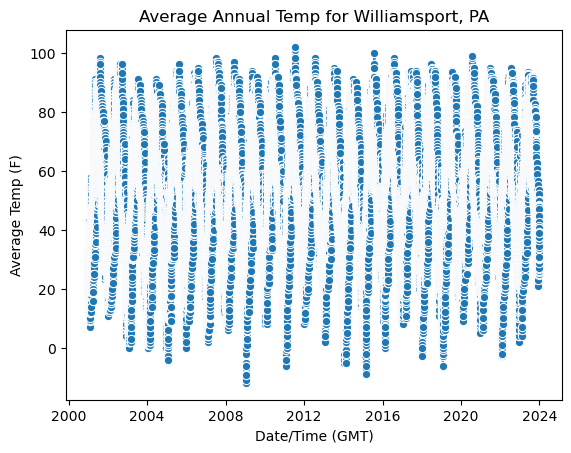

In [38]:
# ANSWER
sns.lineplot(x = "Date/Time (GMT)", y = "Average Temp (F)", data = df_temps, marker = 'o')
plt.title("Average Annual Temp for Williamsport, PA")


---
**34)**	[P] That previous plot is a bit ridiculous. You really need to aggregate your data over some time interval. The most meaningful one will be by year. Compute the mean of the hourly average temperature for each year plot this annual value. (HINT: The `resample()` method will again make this incredibly easy to do!)

Text(0.5, 1.0, 'Average Annual Temp for Williamsport, PA')

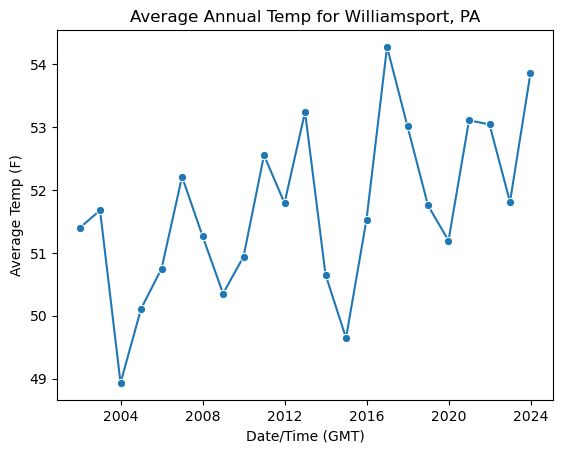

In [39]:
# ANSWER
resampled_data = df_temps.resample('Y').mean()
sns.lineplot(x = resampled_data.index, y = "Average Temp (F)", data = resampled_data, marker = 'o')
plt.title("Average Annual Temp for Williamsport, PA")

---
**35)** [P] For your final question, redraw the above plot with the addition of a linear regression line that shows uncertainty around the line (HINT: `sns.regplot` will make this easy.). Without surprise these days, it'll show a steady upward trend in the average temperature over the years. 


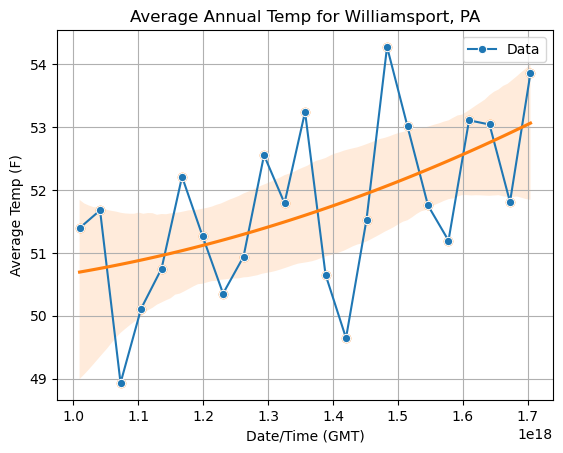

In [40]:
# ANSWER
resampled_data['NumericDate'] = resampled_data.index.map(lambda x: x.value)

sns.lineplot(x='NumericDate', y="Average Temp (F)", data=resampled_data, marker='o', label='Data')
sns.regplot(x='NumericDate', y="Average Temp (F)", data=resampled_data, scatter=True, label='Regression line', order = 2)

plt.title("Average Annual Temp for Williamsport, PA")
plt.xlabel("Date/Time (GMT)")
plt.grid(True)
plt.show()


---
Congratulations! At this point, you performed your first real-world example of what you need to go through to complete basic preprocessing steps!

Before you consider your work complete, please verify that your plots looks good. They have a title, and the axes are labeled. You should have a legend if necessary. And, you should have a grid. These are all basic, but important steps to make sure your plots are interpretable by others.

# Deliverables
1.	Be sure you have every cell run, and output generated.
2.	Commit and push `lab06.ipynb`. Verify that your file is pushed properly on Gitlab.
3.	Generate a paginated PDF file of your notebook and upload to Gradescope
4.	Be sure to select the pages that have the specified questions, and submit when done
